#load CSV file into memory

In [ ]:
import pylab
import pandas as pd
import seaborn as sns
import numpy as np

In [18]:
uber_data = pd.read_csv("Desktop/uber-raw-data-apr14.csv")

In [19]:
uber_data.head(5)

,Date/Time,Lat,Lon,Base
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512
3,4/1/2014 0:28:00,40.7588,-73.9776,B02512
4,4/1/2014 0:33:00,40.7594,-73.9722,B02512


# converted datetime and added useful columns 

In [20]:
uber_data["Date/Time"] = uber_data["Date/Time"].map(pd.to_datetime)

In [21]:
def get_date_of_month(date_time):
    
    return date_time.day 

uber_data["date_of_month"] = uber_data["Date/Time"].map(get_date_of_month)

In [22]:
def get_weekday(date_time):
    
    return date_time.weekday()

uber_data["weekday"] = uber_data["Date/Time"].map(get_weekday)


def get_hour(date_time):
    
    return date_time.hour

uber_data["Hour"] = uber_data["Date/Time"].map(get_hour)





#Analysis of the date of month 

''

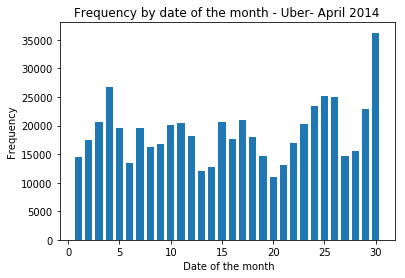

In [7]:
pylab.hist(uber_data.date_of_month, bins = 30, rwidth = 0.7, range = (0.5, 30.5) )
pylab.xlabel(" Date of the month")
pylab.ylabel("Frequency")
pylab.title("Frequency by date of the month - Uber- April 2014")
;

In [8]:
def count_rows(rows):
    return (len(rows))

by_date = uber_data.groupby("date_of_month").apply(count_rows)

In [9]:
by_date_sorted = by_date.sort_values()

In [10]:
by_date_sorted

date_of_month
20    11017
13    12112
14    12674
21    13162
6     13445
1     14546
19    14602
27    14677
28    15475
8     16188
9     16843
22    16975
2     17474
16    17717
18    18074
12    18170
5     19521
7     19550
10    20041
23    20346
11    20420
15    20641
3     20701
17    20973
29    22835
24    23352
26    24925
25    25095
4     26714
30    36251
dtype: int64

#Analysis per Hour pickups

''

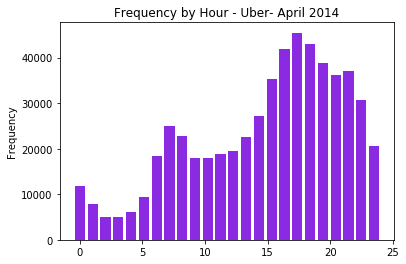

In [11]:
pylab.hist(uber_data.Hour, bins = 24, rwidth = 0.8, range = (-0.5, 24), color = "blueviolet")
pylab.ylabel("Frequency")
pylab.title("Frequency by Hour - Uber- April 2014")
;

# Analysis of Weekday

#Based on the plot below, the data shows that the fequency of Uber trips was highest for Tuesday and Wednesday during 
the course of the week and Sunday is the only day where Uber trips was the lowest amongst the days of the week. 

''

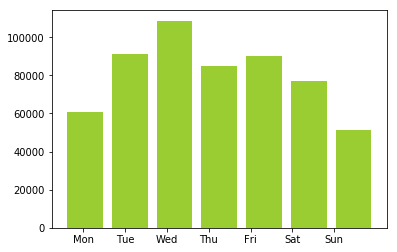

In [12]:
pylab.hist(uber_data.weekday, bins = 7 , rwidth = 0.8, range = (-0.5, 7), color = "yellowgreen")
pylab.xticks(range(7), "Mon Tue Wed Thu Fri Sat Sun".split())
;

#cross analysis of hour and day of the week

In [13]:
by_cross = uber_data.groupby(" weekday Hour".split()).apply(count_rows).unstack()

''

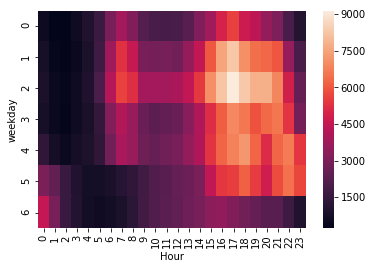

In [14]:
sns.heatmap(by_cross)
;

#Analysis of the data based on latitude and longitude

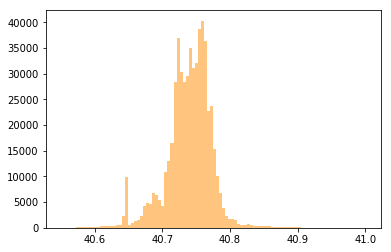

In [45]:
pylab.hist(uber_data["Lat"], bins = 100, range = (40.55 , 41), color = "darkorange", alpha = 0.5);

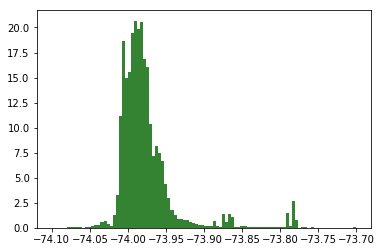

In [43]:
pylab.hist(uber_data["Lon"], bins = 100, range = (-74.1 , -73.70), density = True , color = "darkgreen", alpha = 0.8);

# The plot below shows the distribution of the Uber trips around NYC

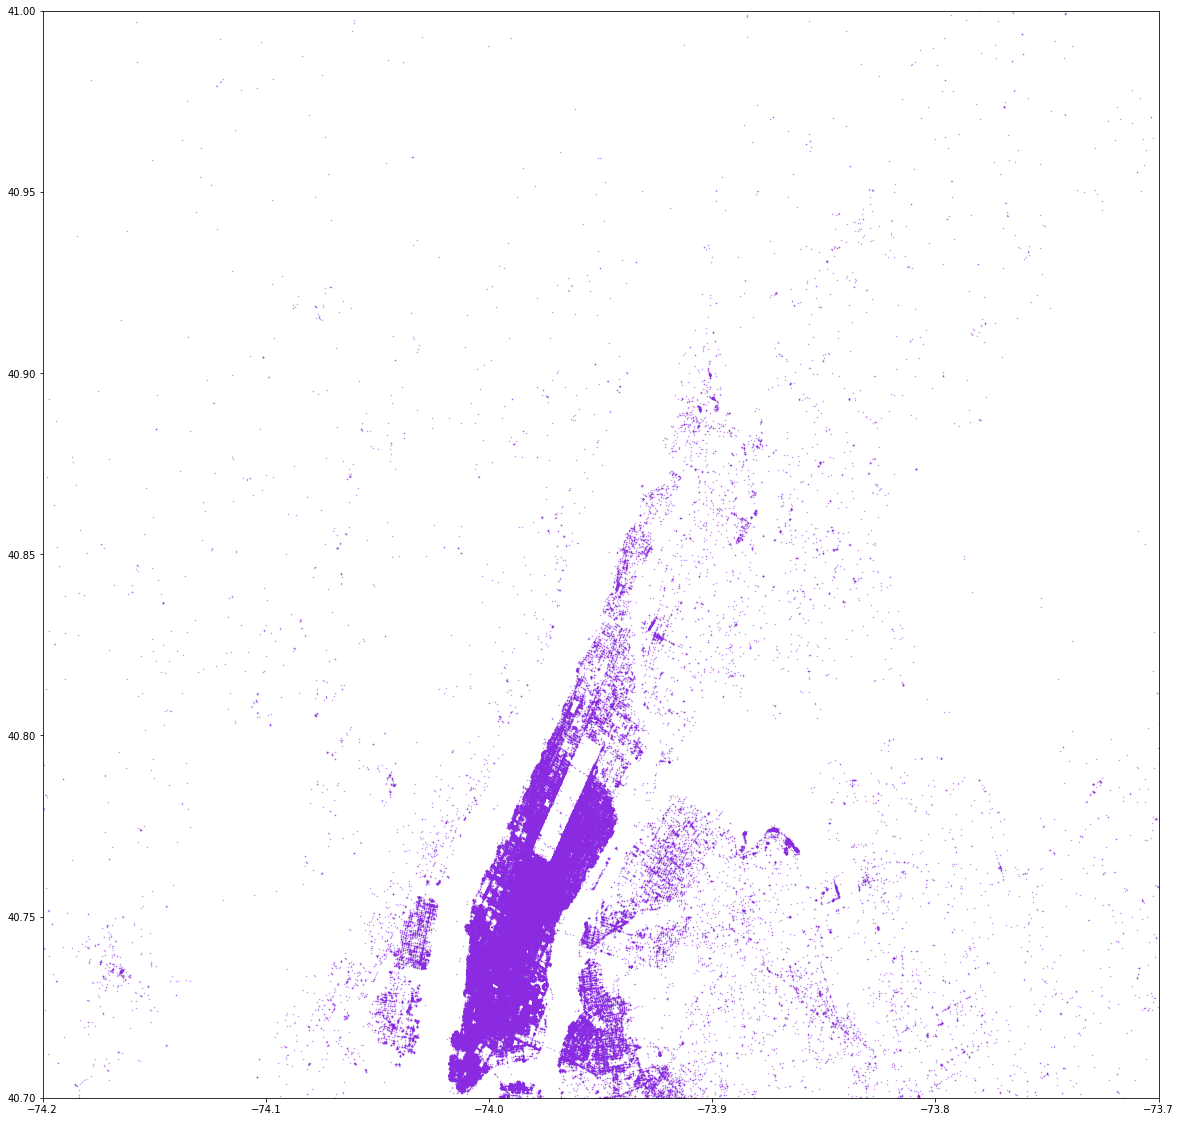

In [61]:
pylab.figure(figsize=[20, 20])
pylab.plot(uber_data["Lon"], uber_data["Lat"] , ".", ms = 1, color = "blueviolet", alpha = 0.5)
pylab.xlim(-74.2, -73.7)
pylab.ylim(40.7, 41);